### Step 1: Import required libraries and dataset

In [1748]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# Supress Warnings
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [1749]:
# Read the dataset
dataset = pd.read_csv("Leads.csv")

### Step 2: Inspecting the Dataframe

In [1750]:
dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1751]:
# Total number of rows and columns
dataset.shape

(9240, 37)

In [1752]:
# Information about the columns of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1753]:
# Checking the statistical information about the numeric columns
dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1754]:
# Helper functions
def calculate_null_values(df):
    return round((df.isnull().sum()/df.shape[0])*100,2) 

In [1755]:
# Calculate missing values %
calculate_null_values(dataset)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Step 3: Data Cleaning
- Drop missing values and columns
- Impute missing values
- Perform encoding

Since the prospect ID and Lead Number won't help in analysis, we can drop them before moving onto missing values.

In [1756]:
dataset.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

Before we handle the missing values, let us convert the "Select" values of the dataset into null values as they are as good as missing values.

In [1757]:
# Check which columns have select as a value
dataset.isin(['Select']).sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [1758]:
# Replace Select values with np.nan
dataset.replace('Select', np.nan, inplace=True)

In [1759]:
# Verifying whether the select values had been replaced
dataset.isin(['Select']).sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [1760]:
# Check null value counts for each column
calculate_null_values(dataset)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [1761]:
# Dropping columns that have > 35% missing values. This threshold is arbitary.
round((dataset.isnull().sum()/dataset.shape[0])*100,2) > 35

Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper Article                                False
X Education Forums                               False
Newspaper 

#### Dropping columns with >35% missing values

In [1762]:
# Drop columns
col_list = ['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
dataset.drop(col_list, axis=1, inplace=True)

In [1763]:
dataset.shape

(9240, 25)

In [1764]:
# Checking percentage of null values per column
calculate_null_values(dataset)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

From the above results we can see that some columns have < 2% missing values. We can simply drop these rows. For the other three columns we can impute the values.

#### Imputing missing values

In [1765]:
# Country - Imputing missing values
dataset['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1766]:
# We will replace this categorical value with the mode of this column
dataset['Country'].fillna(dataset['Country'].mode()[0], inplace=True)

In [1767]:
# Verifying
dataset['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1768]:
# We will drop the unknown values as they are as good as missing values
dataset.drop(dataset[dataset.Country == 'unknown'].index, inplace=True)

In [1769]:
# Verify
dataset['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Bangladesh                 2
Asia/Pacific Region        2
Philippines                2
Italy                      2
Uganda                     2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Russia                     1
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmark       

In [1770]:
# What is your current occupation - Imputing missing values
dataset['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1771]:
# We will replace this categorical value with the mode of this column
dataset['What is your current occupation'].fillna(dataset['What is your current occupation'].mode()[0], inplace=True)

In [1772]:
# Verifying
dataset['What is your current occupation'].value_counts()

Unemployed              8285
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1773]:
# What matters most to you in choosing a course column - imputing missing values
dataset['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1774]:
# Replacing missing values with the mode of the column
dataset['What matters most to you in choosing a course'].fillna("Better Career Prospects", inplace=True)

In [1775]:
# Verifying
dataset['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9232
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1776]:
# Checking null value percentage
calculate_null_values(dataset)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.12
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [1777]:
# Dropping the null values
dataset.dropna(inplace=True)

In [1778]:
# Verification
calculate_null_values(dataset)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [1779]:
# Let's check the number of unique values that each columns have
dataset.nunique()

Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1716
Page Views Per Visit                              113
Last Activity                                      17
Country                                            37
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

Since columns with only one value won't help in analysis, we can drop them

In [1780]:
# Dropping the columns 
col_list = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
dataset.drop(col_list, axis=1, inplace=True)

In [1781]:
# Verification
dataset.nunique()

Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1716
Page Views Per Visit                              113
Last Activity                                      17
Country                                            37
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
A free copy of Mastering The

In [1782]:
dataset.shape

(9069, 20)

Before we encode our data, we need to visualise the data.

#### Step 4: Data Visualisation
- For numeric variables: 
    - We create box plots and accordingly remove outliers.
    - We create a heatmap using a correlation matrix.
- For categorical variables:
    - We create count plots with respect to the target variable.

In [1783]:
# Helper functions

def calculate_vif(X):
    var_fact = pd.DataFrame()
    var_fact['Features'] = X.columns
    var_fact['var_fact'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    var_fact['var_fact'] = round(var_fact['var_fact'], 2)
    var_fact = var_fact.sort_values(by = "var_fact", ascending = False)
    return var_fact

def create_count_plots(data, x):
    sns.countplot(data = data, x = x, hue = "Converted")
    plt.xticks(rotation=90)
    plt.show()

In [1784]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9069 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9069 non-null   object 
 1   Lead Source                                    9069 non-null   object 
 2   Do Not Email                                   9069 non-null   object 
 3   Do Not Call                                    9069 non-null   object 
 4   Converted                                      9069 non-null   int64  
 5   TotalVisits                                    9069 non-null   float64
 6   Total Time Spent on Website                    9069 non-null   int64  
 7   Page Views Per Visit                           9069 non-null   float64
 8   Last Activity                                  9069 non-null   object 
 9   Country                                        9069 

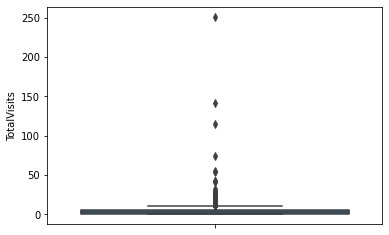

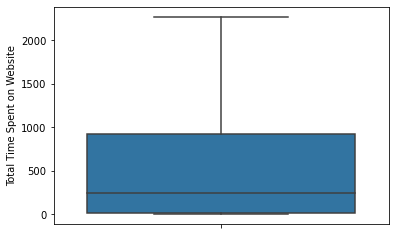

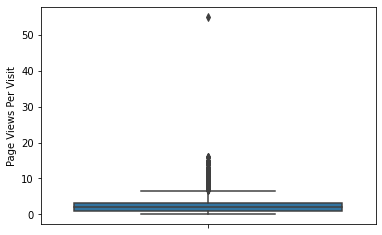

In [1785]:
# Box plot for numeric variables
numeric_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for var in numeric_vars:
    sns.boxplot(y = dataset[var])
    plt.show()

As we can see that the columns, TotalVisits and Page Views Per Visit have outliers. We will treat the outliers accordingly.

In [1786]:
# Checking the quantile scores for TotalVisits
quantiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.99, 0.999, 0.9999]
dataset['TotalVisits'].quantile(quantiles)

0.0500      0.000
0.1000      0.000
0.2500      1.000
0.5000      3.000
0.7500      5.000
0.9000      7.000
0.9500     10.000
0.9700     11.000
0.9900     17.000
0.9990     31.864
0.9999    151.252
Name: TotalVisits, dtype: float64

Since we can see that the values beyond the 95th percentile are disproportionately larger, we cap these values at the 95th percentile.

In [1787]:
# Capping the outliers
dataset = dataset[dataset['TotalVisits'] < dataset['TotalVisits'].quantile(0.95)]

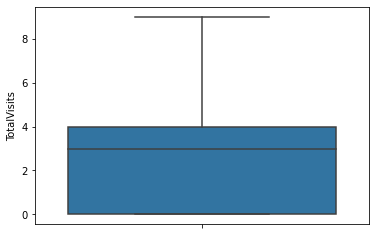

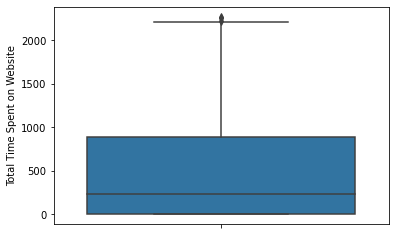

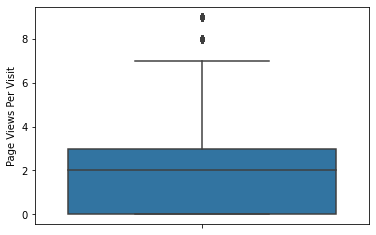

In [1788]:
# Checking the box plots again
numeric_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for var in numeric_vars:
    sns.boxplot(y = dataset[var])
    plt.show()

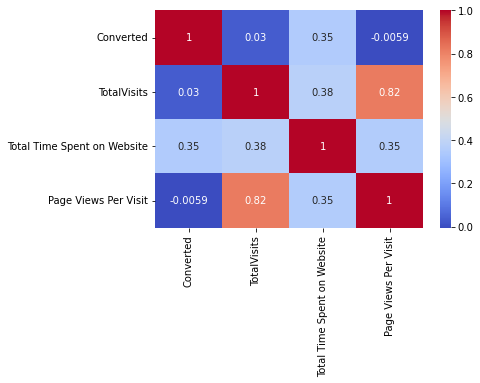

In [1789]:
# Creating a heatmap using a correlation matrix
sns.heatmap(dataset.corr(), annot = True, cmap = "coolwarm")
plt.show()

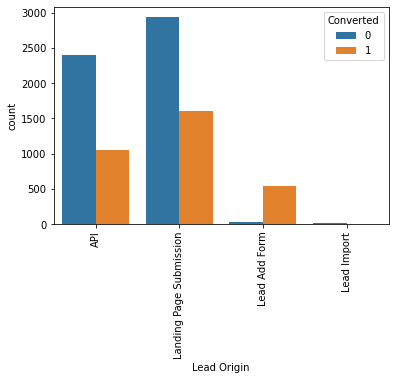

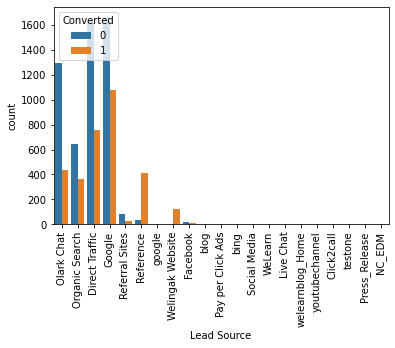

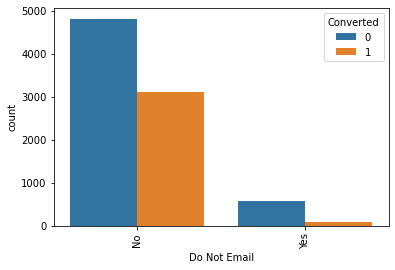

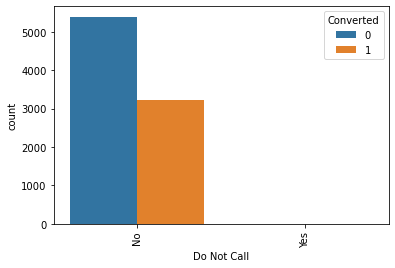

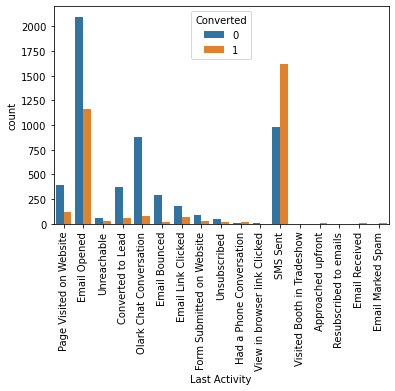

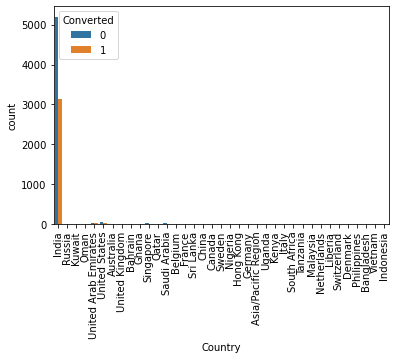

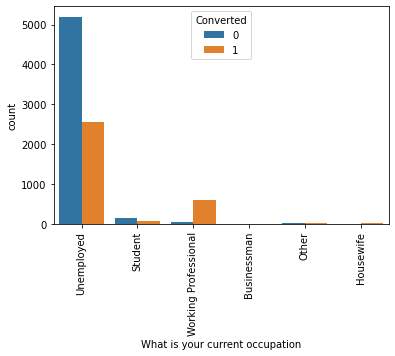

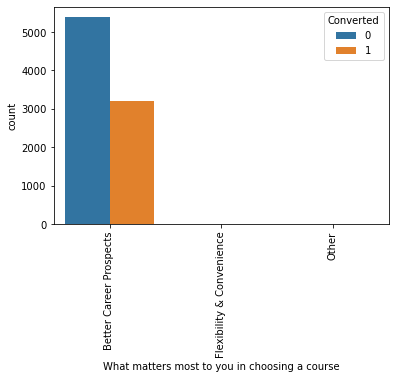

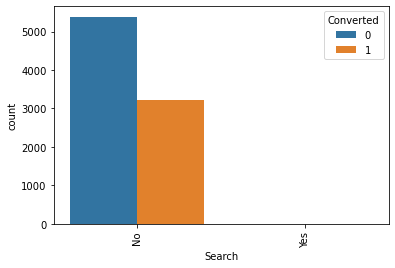

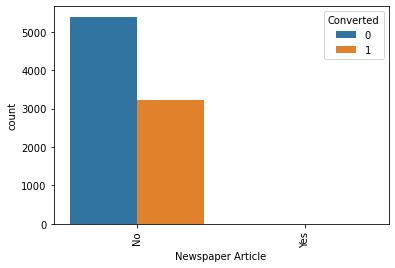

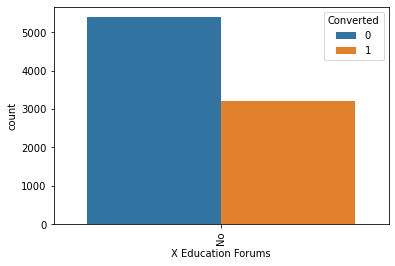

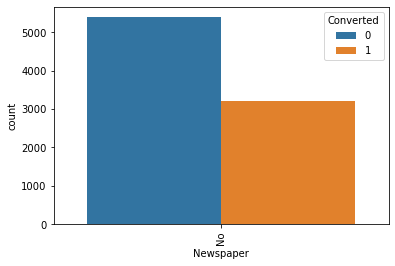

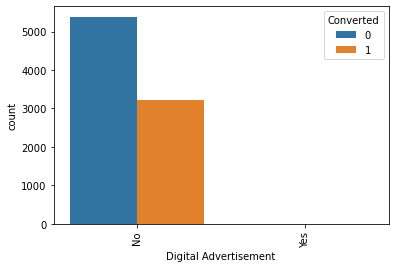

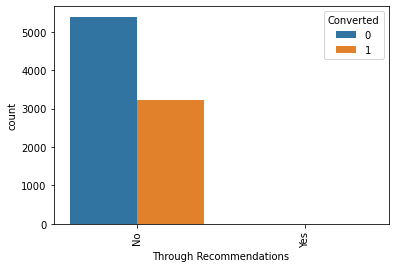

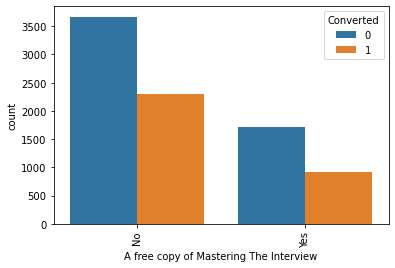

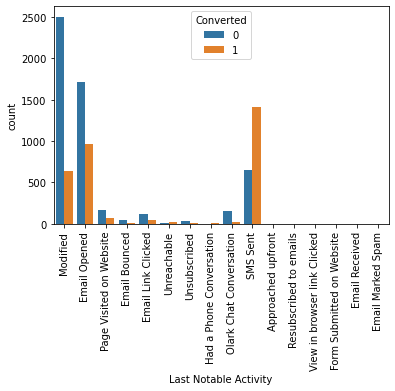

In [1790]:
for cols in dataset.select_dtypes(include=['object']).columns:
    create_count_plots(dataset, cols)

From the above visualisations we can see that:
- Lead Add Form has the highest conversion rate.
- API and Landing Page Submission generate the maximum number of leads even and their conversion rate is below 50%.
- Google, Direct Traffic and Olark Chart generate a lot of leads.
- People who come via references and the Welingak website have the highest conversion rate but don't produce a lot of leads.
- Most of the people don't like to be contacted via email or calls about offers and course information.
- Customers whose last activity includes opening the email and being sent an sms are among the group that generates the maximum number of leads with the latter having a high conversion rate.
- Unemployed people generate most of the leads while working professionals have the highest conversion rate.
- The columns Newspaper and X Education Forums have only one value in their column and therefore should be dropped.
- Columns like Country, Digital Advertisement and Through Recommendations don't provide much information and can be dropped as well.

In [1791]:
# Dropping columns 
dataset.drop(['Newspaper', 'X Education Forums', 'Country','Digital Advertisement', 'Through Recommendations'], axis=1, inplace=True)

In [1792]:
# Verifiying
dataset.nunique()

Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        10
Total Time Spent on Website                      1681
Page Views Per Visit                               27
Last Activity                                      17
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
A free copy of Mastering The Interview              2
Last Notable Activity                              16
dtype: int64

In [1793]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8603 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8603 non-null   object 
 1   Lead Source                                    8603 non-null   object 
 2   Do Not Email                                   8603 non-null   object 
 3   Do Not Call                                    8603 non-null   object 
 4   Converted                                      8603 non-null   int64  
 5   TotalVisits                                    8603 non-null   float64
 6   Total Time Spent on Website                    8603 non-null   int64  
 7   Page Views Per Visit                           8603 non-null   float64
 8   Last Activity                                  8603 non-null   object 
 9   What is your current occupation                8603 

#### Data encoding
- Convert Binary variables to 1/0 values.
- Perform dummy encoding: We perform dummy encoding that lets us use p-1 dummy variables for p different categories.

In [1794]:
# Binary value mapping
binary_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'A free copy of Mastering The Interview']
dataset[binary_cols] = dataset[binary_cols].apply(lambda x: x.map({"Yes":1, "No":0}))

In [1795]:
dataset.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,Modified


In [1796]:
dummy_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity']
dataset = pd.get_dummies(data = dataset, columns = dummy_cols, drop_first = True)
dataset.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


#### Step 5a: Split the dataset into a test set and a training set
- The training:test ratio will be 80:20 as there are only 8603 values.

In [1797]:
np.random.seed(0)
data_train, data_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

#### Step 5b: Feature Scaling
- Using a StandardScaler on all the numeric columns

In [1798]:
standard_scaler = StandardScaler()

In [1799]:
# Numeric columns
numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Performing a Fit() and Transform() on all the numeric variables (excluding dummy variables) of the training set.
data_train[numeric_cols] = standard_scaler.fit_transform(data_train[numeric_cols])

#### Step 5c: Splitting the predictor and target variables
- For the training data
- For the test data

In [1800]:
# Training Data
data_train_y = data_train.pop('Converted')
data_train_X = data_train

# Testing Data
data_test_y = data_test.pop('Converted')
data_test_X = data_test

#### Step 6a: Building a regression model
- We use RFE to reduce the number of columns.
- We then eliminate variables by looking at the p-value and VIF.

In [1801]:
# Instantiate the logistic regression class
logistic_regression = LogisticRegression()

In [1802]:
# Use RFE to cut-down on variables
rfe = RFE(logistic_regression, n_features_to_select = 15)
rfe = rfe.fit(data_train_X, data_train_y)

In [1803]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False])

In [1804]:
list(zip(data_train_X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Search', False, 42),
 ('Newspaper Article', False, 48),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_NC_EDM', False, 30),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 15),
 ('Lead Source_WeLearn', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bi

In [1805]:
cols = data_train_X.columns[rfe.support_]

In [1806]:
data_train_X.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last A

#### Step 6b: Evaluating and refining the model using statsmodels

In [1807]:
data_train_X_sm = sm.add_constant(data_train_X[cols])
logm2 = sm.GLM(data_train_y, data_train_X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6882
Model:                            GLM   Df Residuals:                     6866
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2889.7
Date:                Wed, 29 Mar 2023   Deviance:                       5779.3
Time:                        00:52:33   Pearson chi2:                 6.73e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6025      0.071      8.482      0.000       0.463       0.742
Do Not Email                                            -1.5584      0.165     -9.419      0.000      -1.883      -1.234
Total Time Spent on Website                              0.9680      0.034     28.279      0.000       0.901       1.035
Lead Origin_Lead Add Form                                3.5724      0.221     16.138      0.000       3.139       4.006
Lead Source_Direct Traffic                              -0.6643      0.078     -8.507      0.000      -0.817      -0.511
Lead Source_Organic Search                              -0.4317      0.104     -4.159      0.000      -0.635      -0.228
Lead Source_Referral Sites                              -0.5892      0.317     -1.859      0.063      -1.210       0.032
Lead Source_Welingak Website                             2.4900      1.033      2.412      0.016       0.466       4.514
Last Activity_Olark Chat Conversation                   -0.8883      0.183     -4.853      0.000      -1.247      -0.530
What is your current occupation_Housewife               22.9607   1.49e+04      0.002      0.999   -2.92e+04    2.93e+04
What is your current occupation_Working Professional     2.8930      0.195     14.800      0.000       2.510       3.276
Last Notable Activity_Email Link Clicked                -1.7207      0.247     -6.973      0.000      -2.204      -1.237
Last Notable Activity_Email Opened                      -1.3775      0.084    -16.429      0.000      -1.542      -1.213
Last Notable Activity_Modified                          -1.9019      0.091    -20.852      0.000      -2.081      -1.723
Last Notable Activity_Olark Chat Conversation           -1.5062      0.356     -4.237      0.000      -2.203      -0.809
Last Notable Activity_Page Visited on Website           -1.5757      0.206     -7.653      0.000      -1.979      -1.172
========================================================================================================================
"""

In [1808]:
print(calculate_vif(data_train_X_sm))

                                             Features  var_fact
0                                               const      5.56
13                     Last Notable Activity_Modified      1.80
12                 Last Notable Activity_Email Opened      1.60
8               Last Activity_Olark Chat Conversation      1.56
3                           Lead Origin_Lead Add Form      1.48
14      Last Notable Activity_Olark Chat Conversation      1.34
7                        Lead Source_Welingak Website      1.30
4                          Lead Source_Direct Traffic      1.20
2                         Total Time Spent on Website      1.15
5                          Lead Source_Organic Search      1.12
10  What is your current occupation_Working Profes...      1.10
1                                        Do Not Email      1.08
15      Last Notable Activity_Page Visited on Website      1.08
11           Last Notable Activity_Email Link Clicked      1.07
6                          Lead Source_R

As we can see that the p-value for 'What is your current occupation_Housewife' is very high so we drop it.

In [1809]:
cols = cols.drop("What is your current occupation_Housewife")

In [1810]:
# Rebuilding model
data_train_X_sm = sm.add_constant(data_train_X[cols])
logm2 = sm.GLM(data_train_y, data_train_X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6882
Model:                            GLM   Df Residuals:                     6867
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.4
Date:                Wed, 29 Mar 2023   Deviance:                       5792.8
Time:                        00:52:33   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3822
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6018      0.071      8.474      0.000       0.463       0.741
Do Not Email                                            -1.5611      0.165     -9.437      0.000      -1.885      -1.237
Total Time Spent on Website                              0.9683      0.034     28.318      0.000       0.901       1.035
Lead Origin_Lead Add Form                                3.5821      0.221     16.198      0.000       3.149       4.016
Lead Source_Direct Traffic                              -0.6649      0.078     -8.523      0.000      -0.818      -0.512
Lead Source_Organic Search                              -0.4241      0.104     -4.096      0.000      -0.627      -0.221
Lead Source_Referral Sites                              -0.5932      0.317     -1.872      0.061      -1.214       0.028
Lead Source_Welingak Website                             2.4770      1.032      2.399      0.016       0.453       4.501
Last Activity_Olark Chat Conversation                   -0.8944      0.183     -4.888      0.000      -1.253      -0.536
What is your current occupation_Working Professional     2.8880      0.195     14.775      0.000       2.505       3.271
Last Notable Activity_Email Link Clicked                -1.7208      0.247     -6.972      0.000      -2.205      -1.237
Last Notable Activity_Email Opened                      -1.3707      0.084    -16.364      0.000      -1.535      -1.207
Last Notable Activity_Modified                          -1.8954      0.091    -20.807      0.000      -2.074      -1.717
Last Notable Activity_Olark Chat Conversation           -1.4996      0.355     -4.218      0.000      -2.196      -0.803
Last Notable Activity_Page Visited on Website           -1.5754      0.206     -7.651      0.000      -1.979      -1.172
========================================================================================================================
"""

In [1811]:
calculate_vif(data_train_X_sm)

,Features,var_fact
0,const,5.56
12,Last Notable Activity_Modified,1.80
11,Last Notable Activity_Email Opened,1.60
8,Last Activity_Olark Chat Conversation,1.56
3,Lead Origin_Lead Add Form,1.48
13,Last Notable Activity_Olark Chat Conversation,1.34
7,Lead Source_Welingak Website,1.30
4,Lead Source_Direct Traffic,1.20
2,Total Time Spent on Website,1.15
5,Lead Source_Organic Search,1.12


Since Lead Source_Referral Sites p-value > 0.05 we drop that column 

In [1812]:
cols = cols.drop('Lead Source_Referral Sites')

In [1813]:
data_train_X_sm = sm.add_constant(data_train_X[cols])
logm2 = sm.GLM(data_train_y, data_train_X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6882
Model:                            GLM   Df Residuals:                     6868
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2898.3
Date:                Wed, 29 Mar 2023   Deviance:                       5796.6
Time:                        00:52:33   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5931      0.071      8.371      0.000       0.454       0.732
Do Not Email                                            -1.5654      0.166     -9.454      0.000      -1.890      -1.241
Total Time Spent on Website                              0.9671      0.034     28.301      0.000       0.900       1.034
Lead Origin_Lead Add Form                                3.5949      0.221     16.260      0.000       3.162       4.028
Lead Source_Direct Traffic                              -0.6514      0.078     -8.383      0.000      -0.804      -0.499
Lead Source_Organic Search                              -0.4108      0.103     -3.975      0.000      -0.613      -0.208
Lead Source_Welingak Website                             2.4772      1.032      2.399      0.016       0.454       4.501
Last Activity_Olark Chat Conversation                   -0.8933      0.183     -4.883      0.000      -1.252      -0.535
What is your current occupation_Working Professional     2.8890      0.196     14.775      0.000       2.506       3.272
Last Notable Activity_Email Link Clicked                -1.7265      0.247     -7.003      0.000      -2.210      -1.243
Last Notable Activity_Email Opened                      -1.3758      0.084    -16.438      0.000      -1.540      -1.212
Last Notable Activity_Modified                          -1.9019      0.091    -20.891      0.000      -2.080      -1.724
Last Notable Activity_Olark Chat Conversation           -1.5028      0.356     -4.227      0.000      -2.200      -0.806
Last Notable Activity_Page Visited on Website           -1.5906      0.206     -7.710      0.000      -1.995      -1.186
========================================================================================================================
"""

In [1814]:
calculate_vif(data_train_X_sm)

,Features,var_fact
0,const,5.54
11,Last Notable Activity_Modified,1.80
10,Last Notable Activity_Email Opened,1.59
7,Last Activity_Olark Chat Conversation,1.56
3,Lead Origin_Lead Add Form,1.48
12,Last Notable Activity_Olark Chat Conversation,1.34
6,Lead Source_Welingak Website,1.30
4,Lead Source_Direct Traffic,1.18
2,Total Time Spent on Website,1.15
5,Lead Source_Organic Search,1.12


Since all the p-values < 0.05 and the VIF is below the threshold, we can consider this as the final model.

In [1815]:
# Predicting the values
data_train_y_pred = res.predict(data_train_X_sm)

In [1816]:
# Reshaping data_train_y_pred
data_train_y_pred = data_train_y_pred.values.reshape(-1)

Creating a dataframe with the Converted values and the predicted probabilities.

In [1817]:
data_train_y_pred_final = pd.DataFrame({"Converted": data_train_y.values, 'Converted_Prob':data_train_y_pred})
data_train_y_pred_final['Prospect ID'] = data_train_y.index
data_train_y_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.884809,5291
1,0,0.463758,7118
2,0,0.524023,8979
3,0,0.092855,4082
4,0,0.142205,233


Creating a new column called predicted whose value = 1 if Converted_Prob > 0.7 else 0.
Here the cut-off value of 0.7 is chosen arbitrarily.

In [1818]:
data_train_y_pred_final['predicted'] = data_train_y_pred_final.Converted_Prob.map(lambda x: 1 if x>0.7 else 0)
data_train_y_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.884809,5291,1
1,0,0.463758,7118,0
2,0,0.524023,8979,0
3,0,0.092855,4082,0
4,0,0.142205,233,0


#### Step 7: Evaluating the given Model
Evaluation will be done using the following metrics:
- accuracy
- sensitivity
- specificity
- false positive rate
- positive predictive value
- negative predictive value

In [1819]:
# Create the confusion matrix
confusion_matrix = metrics.confusion_matrix(data_train_y_pred_final.Converted, data_train_y_pred_final.predicted)
print(confusion_matrix)

[[4112  188]
 [1290 1292]]


In [1820]:
# Accuracy
print(metrics.accuracy_score(data_train_y_pred_final.Converted, data_train_y_pred_final.predicted))

0.7852368497529788


In [1821]:
# True positives, True negatives, False Positives, False Negatives
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [1822]:
# Sensitivity
TP / float(TP+FN)

0.5003872966692486

In [1823]:
# Specificity
TN / float(TN+FP)

0.9562790697674418

In [1824]:
# False positive rate
FP / float(TN+FP)

0.04372093023255814

In [1825]:
# Positive Predictive Value
TP / float(TP+FP)

0.8729729729729729

In [1826]:
# Negative Predictive Value
TN / float(TN+FN)

0.7611995557201037

#### Step 8: Plotting the ROC curve

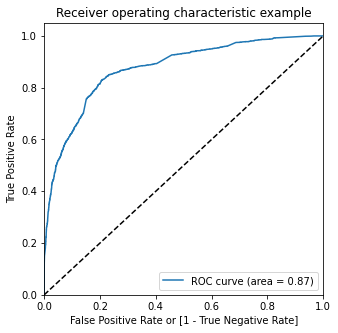

In [1827]:
# Using the function that was used in the lectures
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Plotting the curve
draw_roc(data_train_y_pred_final.Converted, data_train_y_pred_final.Converted_Prob)

The area under the ROC curve should be as close to one as possible. Since the area here is 0.87, it indicates that this is a good model.

We used an arbitrary cut-off of 0.7, which has resulted in a low TP value of 0.5. The next section will focus on finding the cut-off value that balances the accuracy, sensitivity and specificity values.

#### Step 9: Finding the optimal threshold value

In [1828]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for n in numbers:
    data_train_y_pred_final[n] = data_train_y_pred_final.Converted_Prob.map(lambda x: 1 if x > n else 0)
data_train_y_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.884809,5291,1,1,1,1,1,1,1,1,1,1,0
1,0,0.463758,7118,0,1,1,1,1,1,0,0,0,0,0
2,0,0.524023,8979,0,1,1,1,1,1,1,0,0,0,0
3,0,0.092855,4082,0,1,0,0,0,0,0,0,0,0,0
4,0,0.142205,233,0,1,1,0,0,0,0,0,0,0,0


In [1829]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# Using the code given in the lectures
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(data_train_y_pred_final.Converted, data_train_y_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375182  1.000000  0.000000
0.1   0.1  0.553618  0.975213  0.300465
0.2   0.2  0.751816  0.878776  0.675581
0.3   0.3  0.801656  0.842370  0.777209
0.4   0.4  0.809212  0.780790  0.826279
0.5   0.5  0.799768  0.647947  0.890930
0.6   0.6  0.794682  0.566615  0.931628
0.7   0.7  0.785237  0.500387  0.956279
0.8   0.8  0.763877  0.415182  0.973256
0.9   0.9  0.717669  0.261425  0.991628


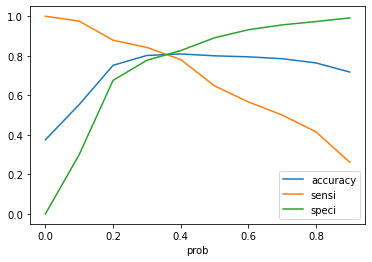

In [1830]:
# Plotting the accuracy, sensitivity, and specificity values for different probabilities
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
plt.show()

From the above visualisation we can see that the optimal curve is between 0.35 and 0.40
We will consider it to be 0.38

In [1831]:
data_train_y_pred_final['final_predicted'] = data_train_y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
data_train_y_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.884809,5291,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.463758,7118,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.524023,8979,0,1,1,1,1,1,1,0,0,0,0,1
3,0,0.092855,4082,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.142205,233,0,1,1,0,0,0,0,0,0,0,0,0


Evaluating the model with a cut-off of 0.38

In [1832]:
# Create the confusion matrix
confusion_matrix = metrics.confusion_matrix(data_train_y_pred_final.Converted, data_train_y_pred_final.final_predicted)
print(confusion_matrix)

[[3510  790]
 [ 532 2050]]


In [1833]:
# Accuracy
print(metrics.accuracy_score(data_train_y_pred_final.Converted, data_train_y_pred_final.final_predicted))

0.8079046788724208


In [1834]:
# True positives, True negatives, False Positives, False Negatives
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [1835]:
# Sensitivity
TP / float(TP+FN)

0.7939581719597212

In [1836]:
# Specificity
TN / float(TN+FP)

0.8162790697674419

In [1837]:
# False positive rate
FP / float(TN+FP)

0.18372093023255814

In [1838]:
# Positive Predictive Value
TP / float(TP+FP)

0.721830985915493

In [1839]:
# Negative Predictive Value
TN / float(TN+FN)

0.8683819891142999

In [1840]:
# Recall
TP / float(TP+FN)

0.7939581719597212

In [1841]:
# Precision
TP / float(TP+FP)

0.721830985915493

Assigning the lead score using the given formula: converted_prob * 100


In [1842]:
data_train_y_pred_final['lead_score'] = data_train_y_pred_final['Converted_Prob'].map(lambda converted_prob: int(round(converted_prob * 100)))
data_train_y_pred_final

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.884809,5291,1,1,1,1,1,1,1,1,1,1,0,1,88
1,0,0.463758,7118,0,1,1,1,1,1,0,0,0,0,0,1,46
2,0,0.524023,8979,0,1,1,1,1,1,1,0,0,0,0,1,52
3,0,0.092855,4082,0,1,0,0,0,0,0,0,0,0,0,0,9
4,0,0.142205,233,0,1,1,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,0,0.284181,397,0,1,1,1,0,0,0,0,0,0,0,0,28
6878,0,0.183460,86,0,1,1,0,0,0,0,0,0,0,0,0,18
6879,0,0.045391,8654,0,1,0,0,0,0,0,0,0,0,0,0,5
6880,0,0.104081,7464,0,1,1,0,0,0,0,0,0,0,0,0,10


Using the evaluation metrics above, we can say that the above model performs adequately with respect to the objectives of the problem.

#### Step 10: Test set predictions

In [1843]:
# Transforming the numeric columns of the test set
data_test_X[numeric_cols] = standard_scaler.transform(data_test_X[numeric_cols])

In [1844]:
# Have the same columns as the model
data_test_X = data_test_X[cols]

In [1845]:
# Add constant for statsmodel
data_test_X_sm = sm.add_constant(data_test_X)

In [1846]:
# Test set predictions
data_test_y_pred = res.predict(data_test_X_sm)

In [1847]:
data_test_y_pred

390     0.187491
7996    0.488777
5405    0.620662
6591    0.436979
4224    0.831683
          ...   
2181    0.238592
8575    0.048989
7666    0.902810
7892    0.462295
1773    0.723269
Length: 1721, dtype: float64

In [1848]:
# Convert data_test_y_pred to a DataFrame
data_test_y_pred_df = pd.DataFrame(data_test_y_pred)
data_test_y_pred_df.head()

,0
390,0.187491
7996,0.488777
5405,0.620662
6591,0.436979
4224,0.831683


In [1849]:
# Convert data_test_y to a DataFrame
data_test_y_df = pd.DataFrame(data_test_y)
data_test_y_df.head()

,Converted
390,0
7996,1
5405,0
6591,1
4224,1


In [1850]:
# Add Prospect ID to index
data_test_y_df['Prospect ID']  = data_test_y_df.index

In [1851]:
# Removing indices 
data_test_y_pred_df.reset_index(drop = True, inplace = True)
data_test_y_df.reset_index(drop = True, inplace = True)

In [1852]:
# Appending the dataframes
data_test_y_pred_final = pd.concat([data_test_y_df, data_test_y_pred_df], axis = 1)

In [1853]:
data_test_y_pred_final.head()

,Converted,Prospect ID,0
0,0,390,0.187491
1,1,7996,0.488777
2,0,5405,0.620662
3,1,6591,0.436979
4,1,4224,0.831683


In [1854]:
# Rename and rearrange columns
data_test_y_pred_final = data_test_y_pred_final.rename(columns = {0 : 'Converted_Prob'})

In [1855]:
data_test_y_pred_final = data_test_y_pred_final.reindex(['Prospect ID', 'Converted', 'Converted_Prob'], axis = 1)

In [1856]:
data_test_y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,390,0,0.187491
1,7996,1,0.488777
2,5405,0,0.620662
3,6591,1,0.436979
4,4224,1,0.831683


In [1876]:
# add integer lead score
data_test_y_pred_final['lead_score'] = round(data_test_y_pred_final['Converted_Prob'] * 100)

In [1877]:
data_test_y_pred_final['lead_score'] = data_test_y_pred_final['lead_score'].apply(lambda x: int(x))

In [1878]:
data_test_y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,lead_score,conversion_prediction
0,390,0,0.19,19,0
1,7996,1,0.49,49,1
2,5405,0,0.62,62,1
3,6591,1,0.44,44,1
4,4224,1,0.83,83,1


In [1860]:
# Using the threshold value, adding a column that predicts whether a lead is a hot lead or not
data_test_y_pred_final['conversion_prediction'] = data_test_y_pred_final['Converted_Prob'].apply(lambda x: 1 if x > 0.38 else 0 )

In [1861]:
data_test_y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,lead_score,conversion_prediction
0,390,0,0.187491,19,0
1,7996,1,0.488777,49,1
2,5405,0,0.620662,62,1
3,6591,1,0.436979,44,1
4,4224,1,0.831683,83,1


Checking the metrics

In [1862]:
# Create the confusion matrix
confusion_matrix = metrics.confusion_matrix(data_test_y_pred_final.Converted, data_test_y_pred_final.conversion_prediction)
print(confusion_matrix)

[[887 203]
 [141 490]]


In [1863]:
# Accuracy
print(metrics.accuracy_score(data_test_y_pred_final.Converted, data_test_y_pred_final.conversion_prediction))

0.800116211504939


In [1864]:
# True positives, True negatives, False Positives, False Negatives
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [1865]:
# Sensitivity
TP / float(TP+FN)

0.7765451664025357

In [1866]:
# Specificity
TN / float(TN+FP)

0.8137614678899082

In [1867]:
# False positive rate
FP / float(TN+FP)

0.18623853211009175

In [1868]:
# Positive Predictive Value
TP / float(TP+FP)

0.7070707070707071

In [1869]:
# Negative Predictive Value
TN / float(TN+FN)

0.8628404669260701

In [1870]:
# Recall
TP / float(TP+FN)

0.7765451664025357

In [1871]:
# Precision
TP / float(TP+FP)

0.7070707070707071

In [1882]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6882
Model:                            GLM   Df Residuals:                     6868
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2898.3
Date:                Wed, 29 Mar 2023   Deviance:                       5796.6
Time:                        01:05:17   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5931      0.071      8.371      0.000       0.454       0.732
Do Not Email                                            -1.5654      0.166     -9.454      0.000      -1.890      -1.241
Total Time Spent on Website                              0.9671      0.034     28.301      0.000       0.900       1.034
Lead Origin_Lead Add Form                                3.5949      0.221     16.260      0.000       3.162       4.028
Lead Source_Direct Traffic                              -0.6514      0.078     -8.383      0.000      -0.804      -0.499
Lead Source_Organic Search                              -0.4108      0.103     -3.975      0.000      -0.613      -0.208
Lead Source_Welingak Website                             2.4772      1.032      2.399      0.016       0.454       4.501
Last Activity_Olark Chat Conversation                   -0.8933      0.183     -4.883      0.000      -1.252      -0.535
What is your current occupation_Working Professional     2.8890      0.196     14.775      0.000       2.506       3.272
Last Notable Activity_Email Link Clicked                -1.7265      0.247     -7.003      0.000      -2.210      -1.243
Last Notable Activity_Email Opened                      -1.3758      0.084    -16.438      0.000      -1.540      -1.212
Last Notable Activity_Modified                          -1.9019      0.091    -20.891      0.000      -2.080      -1.724
Last Notable Activity_Olark Chat Conversation           -1.5028      0.356     -4.227      0.000      -2.200      -0.806
Last Notable Activity_Page Visited on Website           -1.5906      0.206     -7.710      0.000      -1.995      -1.186
========================================================================================================================
"""

Since the evaluation metrics of the model on the train and test set are not that different, we can conclude that the model is stable and is performing well.